<a href="https://colab.research.google.com/github/santosh4568/Car-Sales-Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Car_Sales.csv")
dataset.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,01-02-2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01-02-2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01-02-2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01-02-2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01-02-2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [3]:
dataset.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

In [4]:
dataset.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [5]:
dataset.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [7]:
df = dataset.drop(['Car_id' , 'Date' , 'Customer Name' , 'Annual Income', 'Phone'] , axis='columns')
df.head()

,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,Male,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora
2,Male,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,Greenville
3,Male,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,Pasco
4,Male,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,Janesville


In [8]:
dataset.value_counts(dataset['Gender'])

Gender
Male      18798
Female     5108
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

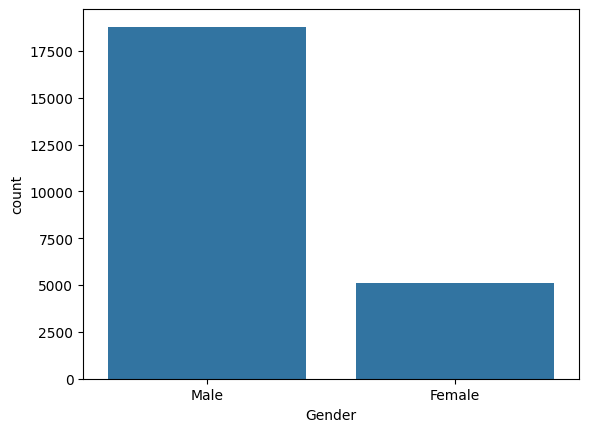

In [9]:
sns.countplot(data=dataset , x='Gender')

In [10]:
dataset.value_counts(dataset['Dealer_Name'])

Dealer_Name
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1251
Tri-State Mack Inc                                 1249
Star Enterprises Inc                               1249
Ryder Truck Rental and Leasing                     1248
U-Haul CO                                          1247
Scrivener Performance Engineering                  1246
Suburban Ford                                      1243
Nebo Chevrolet                                      633
Pars Auto Sales                                     630
McKinney Dodge Chrysler Jeep                        629
New Castle Ford Lincoln Mercury                     629
Hatfield Volkswagen                                 629
Gartner Buick Hyundai Saab                          628
Capitol KIA                                         628
Pitre Buick-Pontiac-Gmc of Scottsdal

<Axes: xlabel='Dealer_Name', ylabel='count'>

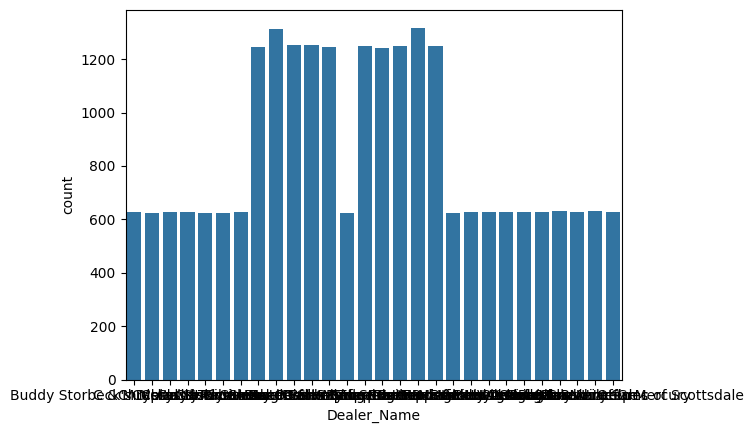

In [11]:
sns.countplot(data=dataset , x='Dealer_Name')

In [12]:
dataset.value_counts(dataset['Company'])

Company
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: count, dtype: int64

<Axes: xlabel='Company', ylabel='count'>

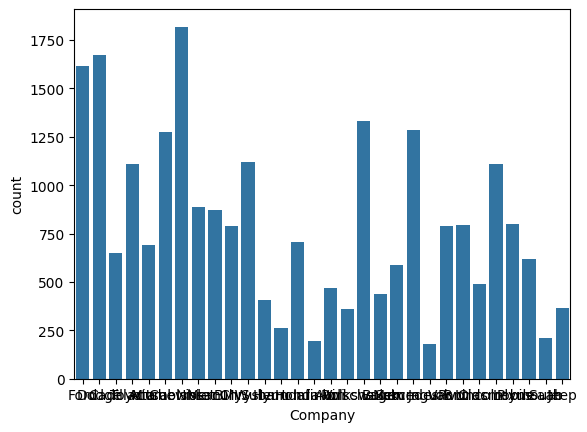

In [13]:
sns.countplot(data=dataset , x='Company')

In [14]:
df.columns

Index(['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission',
       'Color', 'Price ($)', 'Dealer_No ', 'Body Style', 'Dealer_Region'],
      dtype='object')

In [15]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
from wordcloud import WordCloud , STOPWORDS
stopwords = set(STOPWORDS)

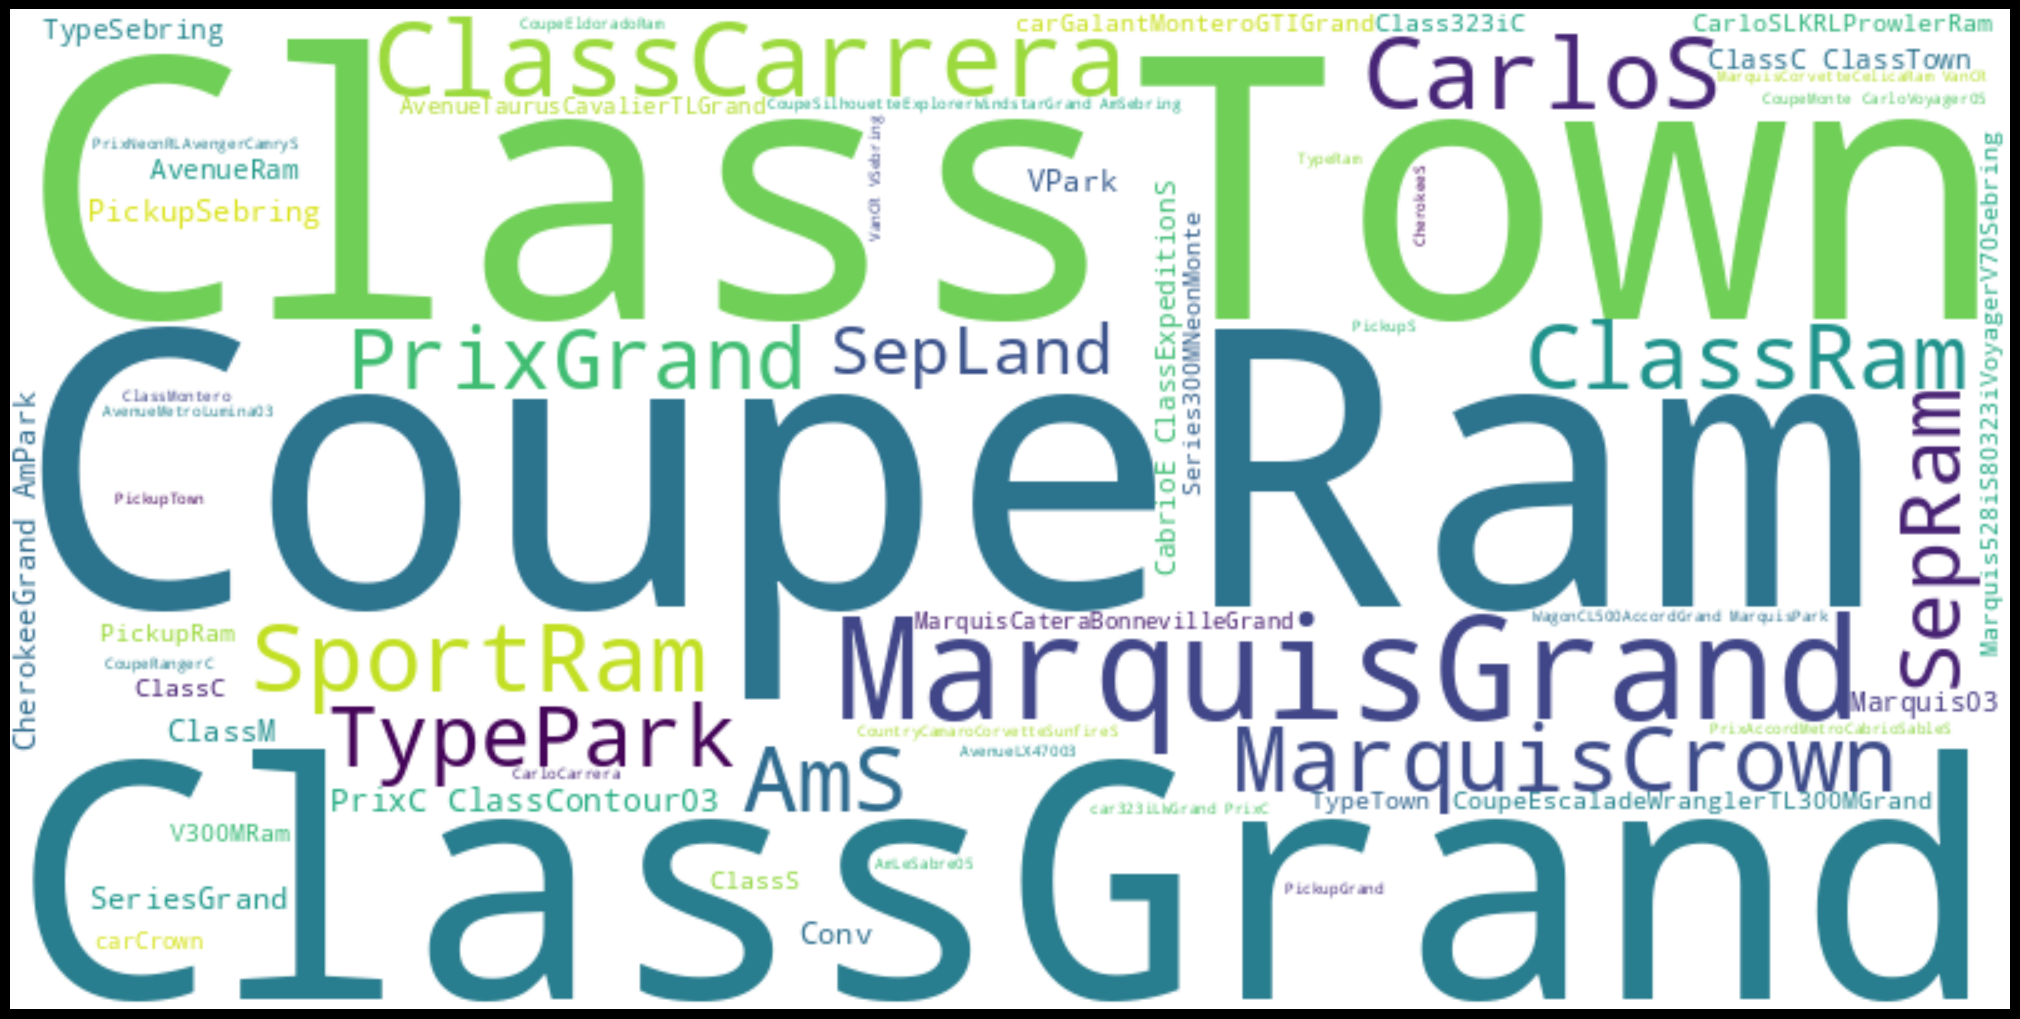

In [17]:
wordcloud = WordCloud(stopwords = stopwords , width=800 , height=400 , background_color="white").generate(''.join(df['Model']))
plt.figure(figsize=(20,10) , facecolor='k')
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

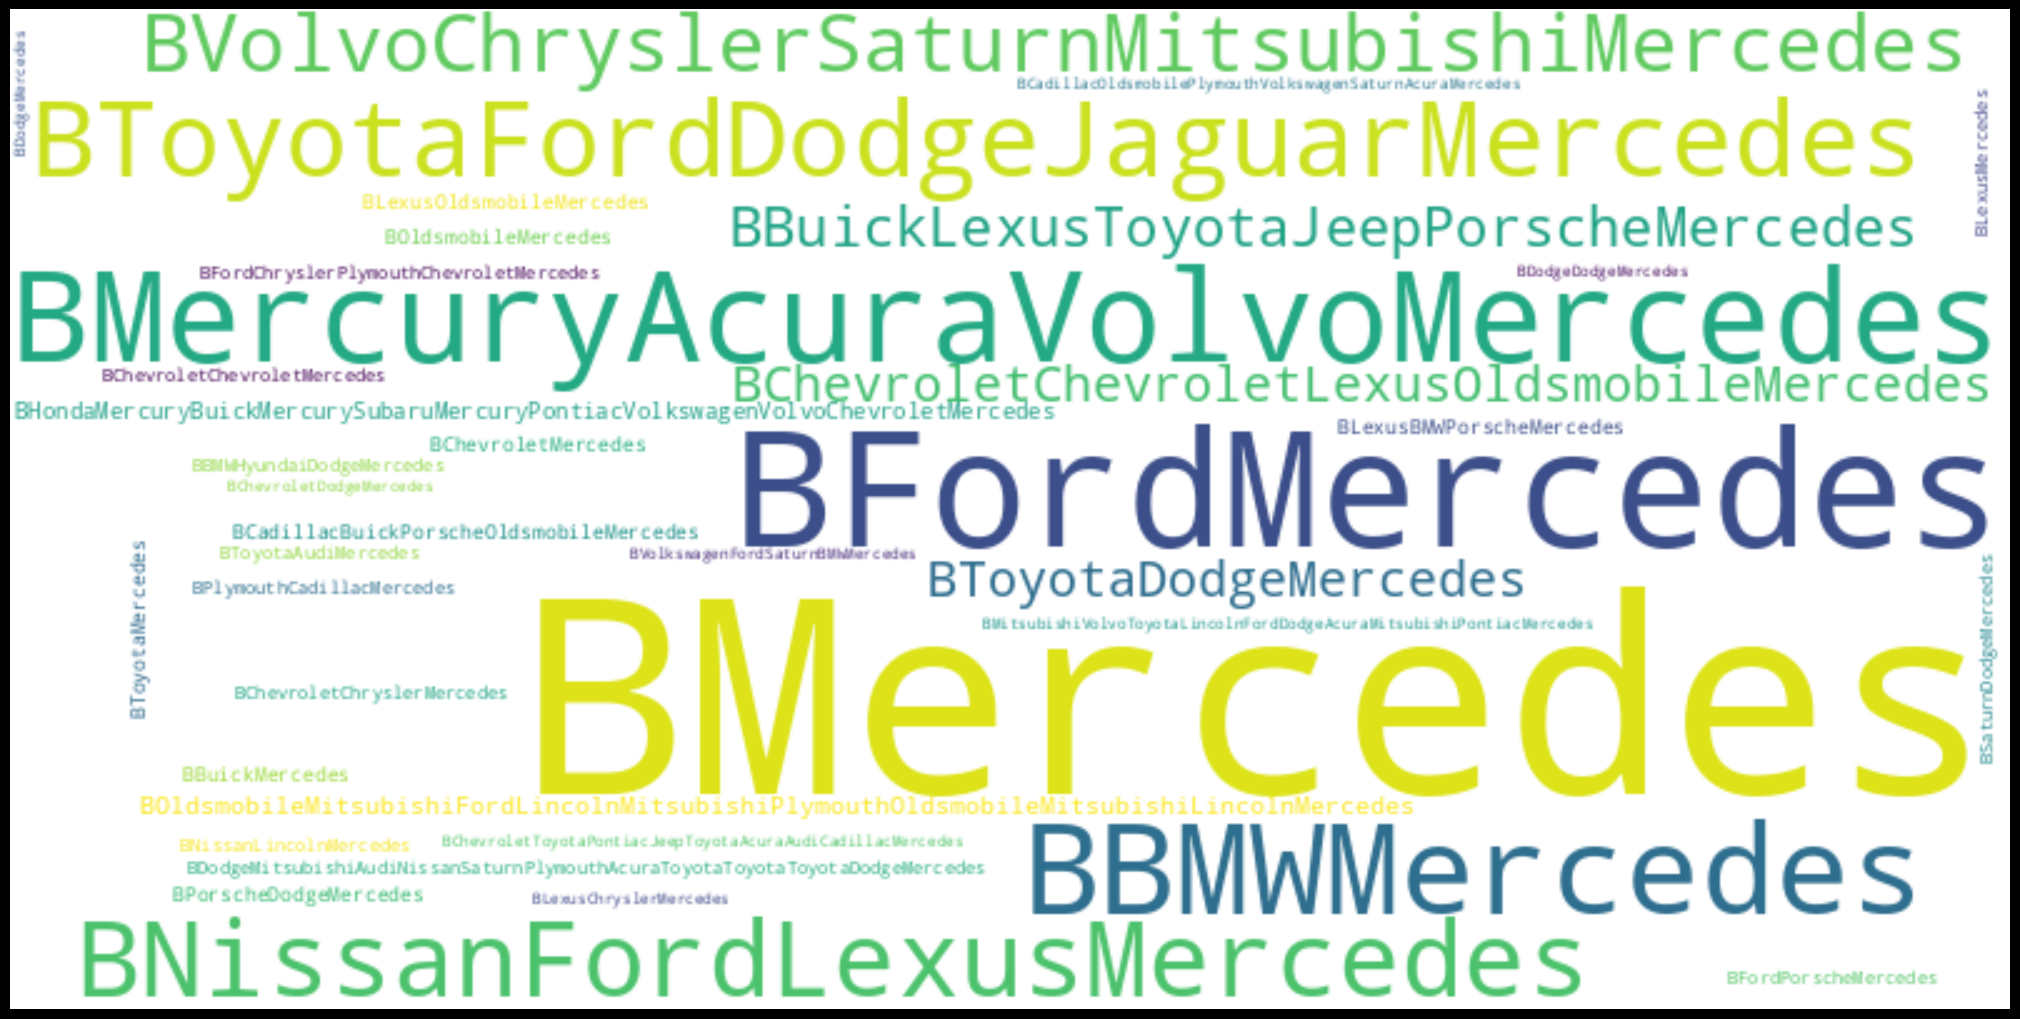

In [18]:
wordcloud = WordCloud(stopwords = stopwords , width=800 , height=400 , background_color="white").generate(''.join(df['Company']))
plt.figure(figsize=(20,10) , facecolor='k')
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
l=list()
for i in range(len(df['Price ($)'])):
  if df['Price ($)'][i] < 25000:
    l.append("Low Price")
  elif df['Price ($)'][i] >= 25000 and df['Price ($)'][i] < 50000:
    l.append("Moderate Price")
  else:
    l.append("High Price")

In [20]:
df.insert(11 , "Price Category" , l)
df.head()

,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region,Price Category
0,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown,Moderate Price
1,Male,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora,Low Price
2,Male,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,Greenville,Moderate Price
3,Male,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,Pasco,Low Price
4,Male,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,Janesville,Low Price


In [21]:
df = df.drop(['Price ($)'] , axis='columns')
df.head()

,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Dealer_No,Body Style,Dealer_Region,Price Category
0,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,06457-3834,SUV,Middletown,Moderate Price
1,Male,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,60504-7114,SUV,Aurora,Low Price
2,Male,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,38701-8047,Passenger,Greenville,Moderate Price
3,Male,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,99301-3882,SUV,Pasco,Low Price
4,Male,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,53546-9427,Hatchback,Janesville,Low Price


In [22]:
df.nunique()

Gender              2
Dealer_Name        28
Company            30
Model             154
Engine              2
Transmission        2
Color               3
Dealer_No           7
Body Style          5
Dealer_Region       7
Price Category      3
dtype: int64

In [23]:
x_attribute = df.drop(['Price Category'], axis='columns')
x_attribute.head()

,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Dealer_No,Body Style,Dealer_Region
0,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,06457-3834,SUV,Middletown
1,Male,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,60504-7114,SUV,Aurora
2,Male,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,38701-8047,Passenger,Greenville
3,Male,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,99301-3882,SUV,Pasco
4,Male,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,53546-9427,Hatchback,Janesville


In [24]:
y_attribute = df['Price Category']
y_attribute.head()

0    Moderate Price
1         Low Price
2    Moderate Price
3         Low Price
4         Low Price
Name: Price Category, dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [26]:
y_attribute = label.fit_transform(y_attribute)
y_attribute

array([2, 1, 2, ..., 1, 2, 2])

In [27]:
x_attribute.head()

,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Dealer_No,Body Style,Dealer_Region
0,Male,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,06457-3834,SUV,Middletown
1,Male,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,60504-7114,SUV,Aurora
2,Male,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,38701-8047,Passenger,Greenville
3,Male,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,99301-3882,SUV,Pasco
4,Male,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,53546-9427,Hatchback,Janesville


In [28]:
x_attribute['Gender'] = label.fit_transform(x_attribute['Gender'])
x_attribute.head()

,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Dealer_No,Body Style,Dealer_Region
0,1,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,06457-3834,SUV,Middletown
1,1,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,60504-7114,SUV,Aurora
2,1,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,38701-8047,Passenger,Greenville
3,1,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,99301-3882,SUV,Pasco
4,1,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,53546-9427,Hatchback,Janesville


In [29]:
x_attribute['Dealer_Name'] = label.fit_transform(x_attribute['Dealer_Name'])

In [30]:
x_attribute['Company'] = label.fit_transform(x_attribute['Company'])

In [31]:
x_attribute['Model'] = label.fit_transform(x_attribute['Model'])

In [32]:
x_attribute['Engine'] = label.fit_transform(x_attribute['Engine'])

In [33]:
x_attribute['Transmission'] = label.fit_transform(x_attribute['Transmission'])

In [34]:
x_attribute['Color'] = label.fit_transform(x_attribute['Color'])

In [35]:
x_attribute.columns

Index(['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission',
       'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region'],
      dtype='object')

In [36]:
x_attribute['Dealer_No '] = label.fit_transform(x_attribute['Dealer_No '])

In [37]:
x_attribute['Body Style'] = label.fit_transform(x_attribute['Body Style'])

In [38]:
x_attribute['Dealer_Region'] = label.fit_transform(x_attribute['Dealer_Region'])

In [39]:
x_attribute.head()

,Gender,Dealer_Name,Company,Model,Engine,Transmission,Color,Dealer_No,Body Style,Dealer_Region
0,1,0,8,60,0,0,0,0,3,4
1,1,1,7,52,0,0,0,3,3,0
2,1,2,4,57,1,1,2,1,2,2
3,1,4,27,36,1,1,1,6,3,5
4,1,3,0,141,0,0,2,2,1,3


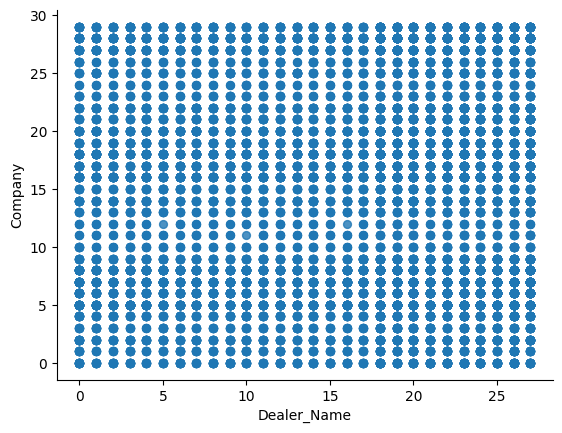

In [44]:
# @title Dealer_Name vs Company

from matplotlib import pyplot as plt
x_attribute.plot(kind='scatter', x='Dealer_Name', y='Company', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

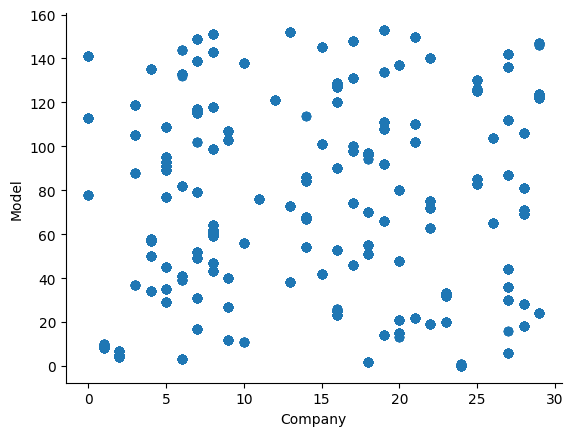

In [43]:
# @title Company vs Model

from matplotlib import pyplot as plt
x_attribute.plot(kind='scatter', x='Company', y='Model', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
correlation = x_attribute.corr()

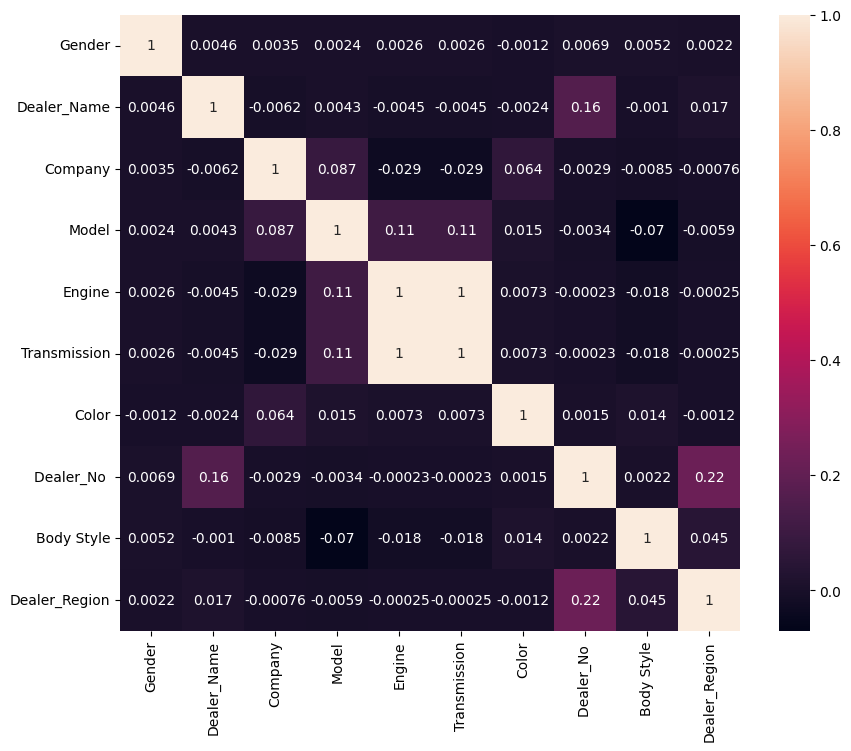

In [42]:
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

# Show the plot
plt.show()

In [45]:
y_attribute

array([2, 1, 2, ..., 1, 2, 2])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x_attribute, y_attribute, test_size=0.2, random_state=42)

In [47]:
len(X_train)

19124

In [48]:
len(X_test)

4782

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
R_model = RandomForestClassifier(n_jobs=-1 , oob_score = True , random_state=1)

In [51]:
R_model.fit(X_train , y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=1)

In [52]:
y_predicted = R_model.predict(X_test)
y_predicted

array([1, 2, 2, ..., 2, 0, 2])

In [53]:
R_model.score(X_test, y_test)

0.8433709744876621

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
G_model = GradientBoostingClassifier(max_depth=3 , n_estimators=100 , learning_rate=0.01)

In [56]:
G_model.fit(X_train , y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [57]:
y_pre = G_model.predict(X_test)
y_pre

array([1, 2, 1, ..., 2, 1, 2])

In [58]:
G_model.score(X_test , y_test)

0.5984943538268507

In [59]:
from sklearn.svm import SVC

In [60]:
S_model = SVC()

In [61]:
S_model.fit(X_train , y_train)

SVC()

In [62]:
y_predict = S_model.predict(X_test)
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
S_model.score(X_test , y_test)

0.5510246758678378

In [64]:
from sklearn.metrics import precision_score , recall_score , f1_score

In [65]:
Random_precision = precision_score(y_test , y_predicted ,average='macro')
Random_precision

0.824024927771454

In [66]:
Random_recall = recall_score(y_test , y_predicted , average='macro')
Random_recall

0.8004558406057235

In [67]:
Random_fScore = f1_score(y_test , y_predicted , average = 'macro')
Random_fScore

0.8114165722059582

In [68]:
Gradient_precision = precision_score(y_test , y_pre , average = 'macro')
Gradient_precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.45937235911313673

In [69]:
Gradient_recall = recall_score(y_test , y_pre , average = 'macro')
Gradient_recall

0.3799717780612924

In [70]:
Gradient_fScore = f1_score(y_test , y_pre , average = 'macro')
Gradient_fScore

0.33295651145087585

In [71]:
SVC_precision = precision_score(y_test , y_predict , average = 'macro')
SVC_precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1836748919559459

In [72]:
SVC_recall = recall_score(y_test , y_predict , average = 'macro')
SVC_recall

0.3333333333333333

In [73]:
SVC_fScore = f1_score(y_test , y_predict , average = 'macro')
SVC_fScore

0.23684328794211498